<h1 align="center">Heart Attack Analysis</h1>

### Group ID:    204

Group Member: 
 
ASHUTOSH KUMAR (<2020fc04341@wilp.bits-pilani.ac.in>)

ASHWINI B R    (<2020fc04180@wilp.bits-pilani.ac.in>)

RAHUL PAUL     (<2020fc04350@wilp.bits-pilani.ac.in>)

# Contents

1. [Introduction](#1) <a id=18></a>
    - 1.1 [Data Dictionary](#2)
    - 1.2 [Objective](#3)
2. [Preparation](#4)
    - 2.1 [Packages](#5)
    - 2.2 [Data](#6)
    - 2.3 [Understanding Data](#7)
3. [Exploratory Data Analysis](#8)
    - 3.1 [Univariate Analysis](#9)
    - 3.2 [Explore the target variable and patients count with low and high risk of heart attack](#10)
    - 3.3 [Correlation Matrix](#22)
4. [Data Preprocessing](#11)
    - 4.1 [Conclusions from the EDA](#12)
    - 4.2 [Packages](#13)
    - 4.3 [Making features model ready](#14)
    - 4.4 [Filter Feature Selection Engineering Techniques](#19)
5. [Modeling](#15)
    - 5.1 [Random Forest Classifiers](#16)
    - 5.2 [Gradient Boosting Classifier](#17)
6. [Performance Comparison of Random Forest & Gradient Boosting Classifier](#20)

[Appendix - RF Hyperparameter Tuning](#21)

### 1. Introduction <a id=1></a>
[back to top](#18)

#### 1.1 Data Dictionary <a id=2></a>
`Age` - Age of the patient

`Sex` - Sex of the patient {0 = Female, 1 = Male}

`CP_Type` - Chest pain type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic)

`BloodPressure` - Resting blood pressure (in mm Hg)

`Cholestrol` - Cholestoral in mg/dl fetched via BMI sensor

`BloodSugar` - fasting blood sugar (1 = True, 0 = False)

`ECG` - Resting electrocardiographic results (0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy)

`MaxHeartRate`  - Maximum heart rate achieved

`FamilyHistory` - Number of persons affected in the family

`ExerciseAngia` - Exercise induced angina (1=Yes, 0=No)

`Target` - Target variable


#### 1.2 Objective <a id=3></a>
To perform EDA and predict if a person is prone to a heart attack or not.

### 2. Preparation <a id=4></a>
[back to top](#18)

#### 2.1 Packages <a id=5></a>

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

#### 2.2 Data <a id=6></a>

In [213]:
os.chdir(r"E:\Data_Science_WILP\Second_Semester\Assignment\IDS")
df = pd.read_csv("Heart_Attack_Analysis_Data.csv")

#### 2.3 Understanding Data <a id=7></a>

##### 2.3.1 The shape of the data

In [214]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 11)


##### 2.3.2 Preview of the first 5 rows of the data

In [215]:
df.head()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1


##### 2.3.3 Checking the number of unique values in each column

In [216]:
dict1 = {}
for i in list(df.columns):
    dict1[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict1,index=["unique count"]).transpose()

,unique count
Age,41
Sex,2
CP_Type,4
BloodPressure,49
Cholestrol,152
BloodSugar,2
ECG,3
MaxHeartRate,91
ExerciseAngia,2
FamilyHistory,6


##### 2.3.4 Checking the data types in each column

In [217]:
df.dtypes

Age              int64
Sex              int64
CP_Type          int64
BloodPressure    int64
Cholestrol       int64
BloodSugar       int64
ECG              int64
MaxHeartRate     int64
ExerciseAngia    int64
FamilyHistory    int64
Target           int64
dtype: object

##### 2.3.5 Checking duplicate rows in dataframe

In [218]:
#Check duplicate rows in data
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape[0])

Number of duplicate rows ::  0


##### 2.3.6 Separating the columns in categorical and continuous

In [219]:
cat_cols = ['Sex','CP_Type','BloodSugar','ECG','ExerciseAngia']
con_cols = ["Age","BloodPressure","Cholestrol","MaxHeartRate","FamilyHistory"]
target_col = ["Target"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['Sex', 'CP_Type', 'BloodSugar', 'ECG', 'ExerciseAngia']
The continuous cols are :  ['Age', 'BloodPressure', 'Cholestrol', 'MaxHeartRate', 'FamilyHistory']
The target variable is :   ['Target']


##### 2.3.7 Summary statistics

In [220]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
BloodPressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
MaxHeartRate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
FamilyHistory,303.0,1.204620,1.096825,0.0,0.0,1.0,2.0,5.0


##### 2.3.8 Missing values

In [221]:
print(df.isnull().sum())
#df.info()

Age              0
Sex              0
CP_Type          0
BloodPressure    0
Cholestrol       0
BloodSugar       0
ECG              0
MaxHeartRate     0
ExerciseAngia    0
FamilyHistory    0
Target           0
dtype: int64


[back to top](#18)

### 3. Exploratory Data Analysis <a id=8></a>

#### 3.1 Univariate Analysis <a id=9></a>

##### 3.1.1 Count plot of categorical features

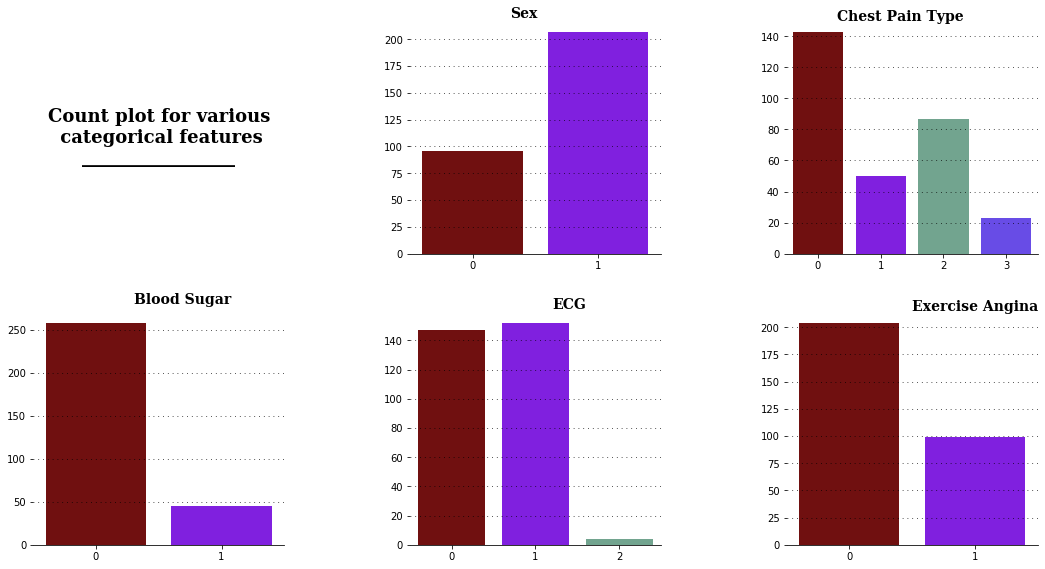

In [222]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='Sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# CP_Type count
ax2.text(0.3, 150, 'Chest Pain Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='CP_Type',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodSugar count
ax3.text(0.3, 280, 'Blood Sugar', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='BloodSugar',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# ECG count
ax4.text(1.2, 162, 'ECG', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='ECG',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# ExerciseAngia count
ax5.text(0.5, 215, 'Exercise Angina', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='ExerciseAngia',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

##### 3.1.2 Boxen plot of continuous features

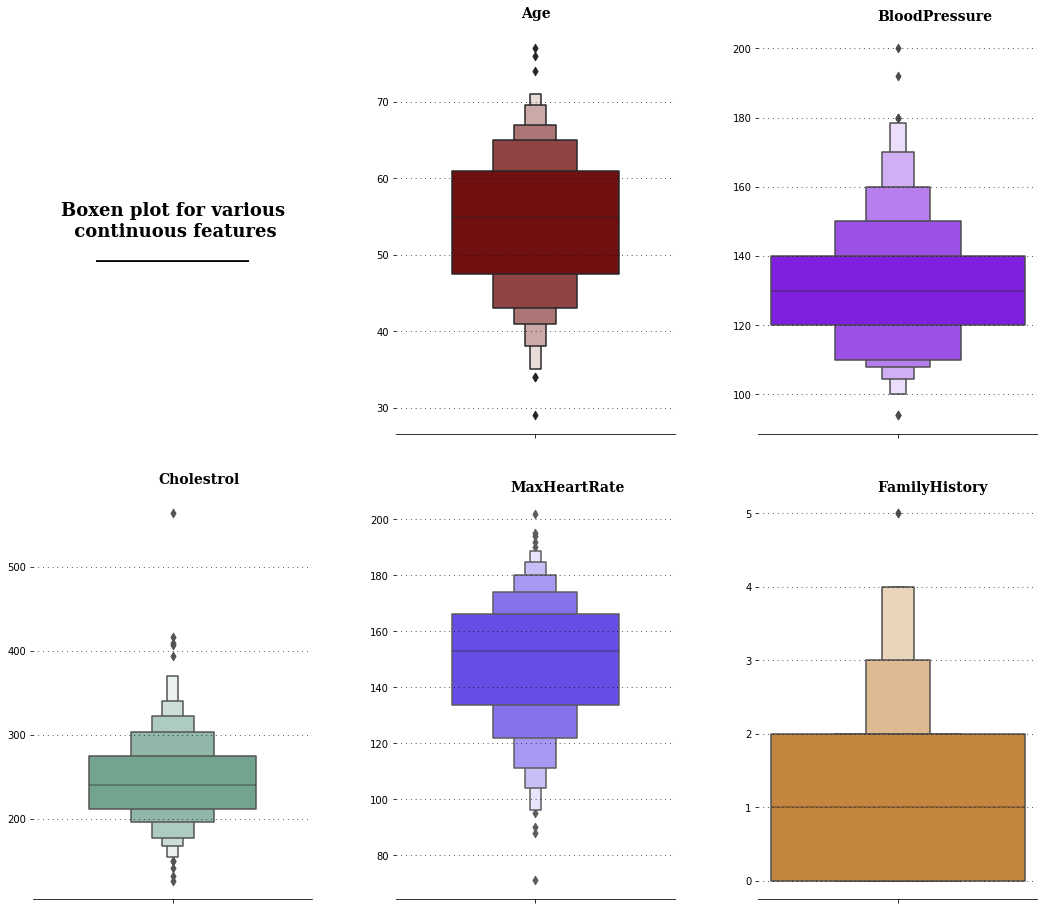

In [223]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")
# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['Age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# BloodPressure 
ax2.text(-0.05, 208, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['BloodPressure'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.autoscale_view(True)

# Cholestrol 
ax3.text(-0.05, 600, 'Cholestrol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['Cholestrol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# MaxHeartRate 
ax4.text(-0.09, 210, 'MaxHeartRate', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['MaxHeartRate'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# FamilyHistory 
ax5.text(-0.05, 5.3, 'FamilyHistory', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['FamilyHistory'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")
ax5.autoscale_view(True)

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

##### 3.1.2 Count plot of target

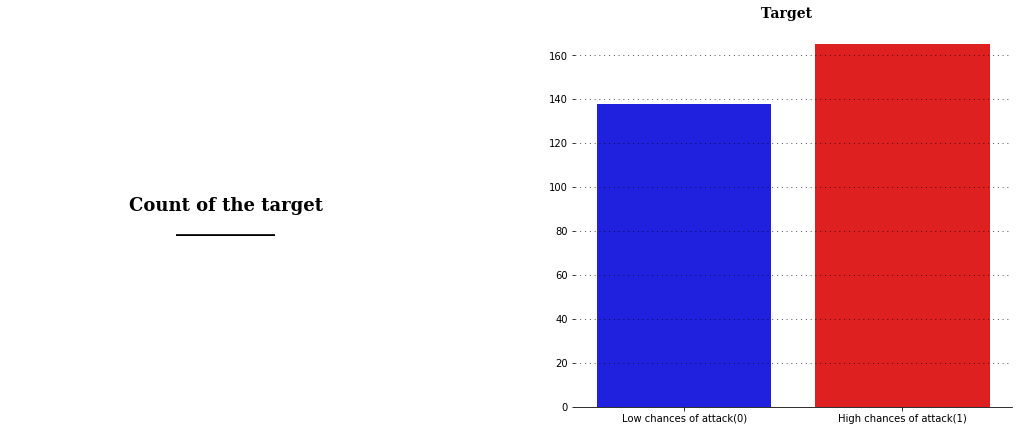

In [224]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

color_palette = {0:'blue', 1:'red'}

# Title of the plot
ax0.text(0.5,0.5,"Count of the target\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Target",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'Target',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

#### 3.2 Explore the target variable and patients count with low and high risk of heart attack <a id=10></a> 

#### 3.2.1 Count plot of Target Variable for Continous Data

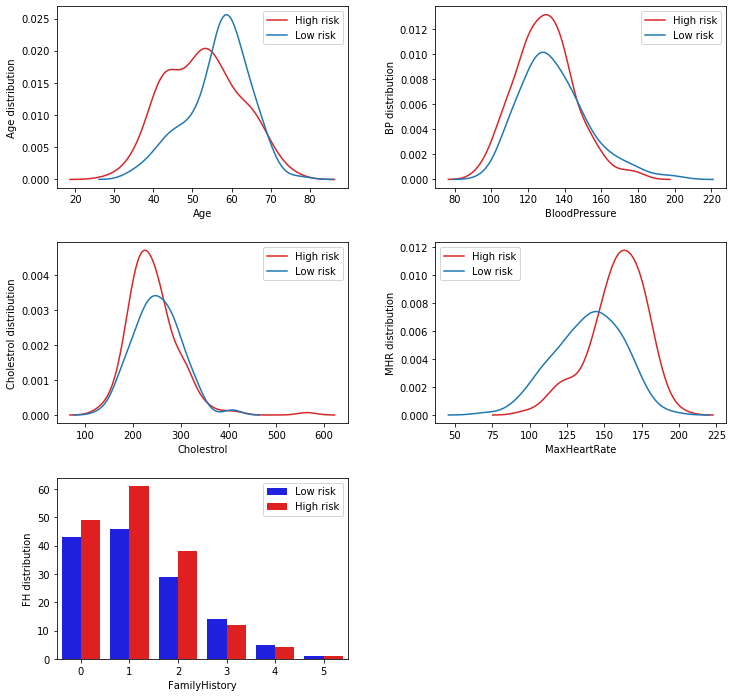

In [225]:
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.3, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])

sns.kdeplot(ax=ax0,data = df, hue = 'Target', bw_adjust = 1, x = 'Age', palette = ['tab:blue', 'tab:red'])
sns.kdeplot(ax=ax1,data = df, hue = 'Target', bw_adjust = 1, x = 'BloodPressure', palette = ['tab:blue', 'tab:red'])
sns.kdeplot(ax=ax2,data = df, hue = 'Target', bw_adjust = 1, x = 'Cholestrol', palette = ['tab:blue', 'tab:red'])
sns.kdeplot(ax=ax3,data = df, hue = 'Target', bw_adjust = 1, x = 'MaxHeartRate', palette = ['tab:blue', 'tab:red'])
sns.countplot(ax=ax4,data = df, x = 'FamilyHistory', hue = 'Target', palette = hue_color)
ax0.legend(["High risk", "Low risk"])
ax1.legend(["High risk", "Low risk"])
ax2.legend(["High risk", "Low risk"])
ax3.legend(["High risk", "Low risk"])
ax4.legend(["Low risk", "High risk"])
ax0.set(xlabel = 'Age', ylabel = 'Age distribution')
ax1.set(xlabel = 'BloodPressure', ylabel = 'BP distribution')
ax2.set(xlabel = 'Cholestrol', ylabel = 'Cholestrol distribution')
ax3.set(xlabel = 'MaxHeartRate', ylabel = 'MHR distribution')
ax4.set(xlabel = 'FamilyHistory', ylabel = 'FH distribution')
plt.show()

#### 3.2.2 Count plot of Target Variable for Categorical Data

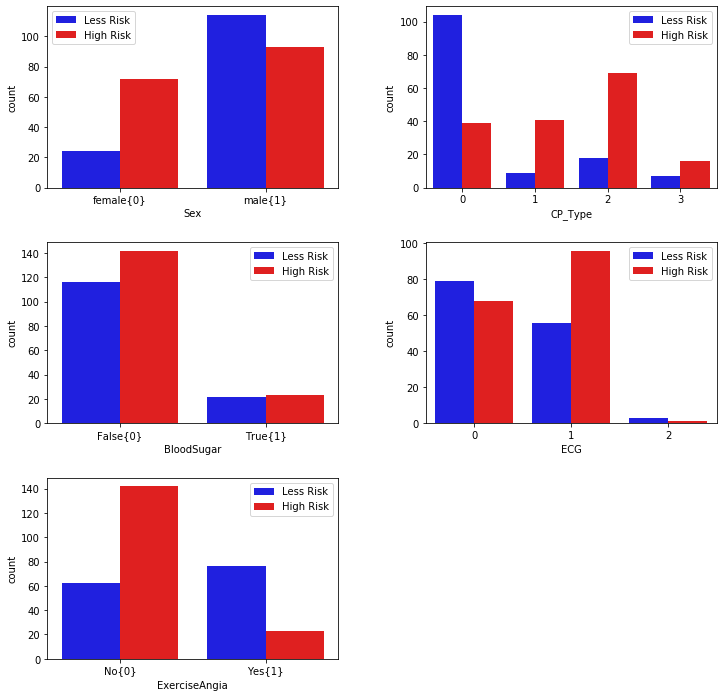

In [226]:
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(3,2)
gs.update(wspace=0.3, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])

hue_color = {0:'blue', 1:'red'}
sex = ['female{0}', 'male{1}']
sns.countplot(ax=ax0,data = df, x = 'Sex', hue = 'Target', palette = hue_color)
ax0.set_xticklabels(labels = sex)
ax0.legend(['Less Risk', 'High Risk'])

sns.countplot(ax=ax1,data = df, x = 'CP_Type', hue = 'Target', palette = hue_color)
ax1.legend(['Less Risk', 'High Risk'])

bs = ['False{0}', 'True{1}']
sns.countplot(ax=ax2,data = df, x = 'BloodSugar', hue = 'Target', palette = hue_color)
ax2.set_xticklabels(labels = bs)
ax2.legend(['Less Risk', 'High Risk'])

sns.countplot(ax=ax3,data = df, x = 'ECG', hue = 'Target', palette = hue_color)
ax3.legend(['Less Risk', 'High Risk'])

ea = ['No{0}', 'Yes{1}']
sns.countplot(ax=ax4,data = df, x = 'ExerciseAngia', hue = 'Target', palette = hue_color)
ax4.set_xticklabels(labels = ea)
ax4.legend(['Less Risk', 'High Risk'])

plt.show()

#### 3.3 Correlation Matrix <a id=22></a>

##### 3.3.1 Correlation matrix of continuous features

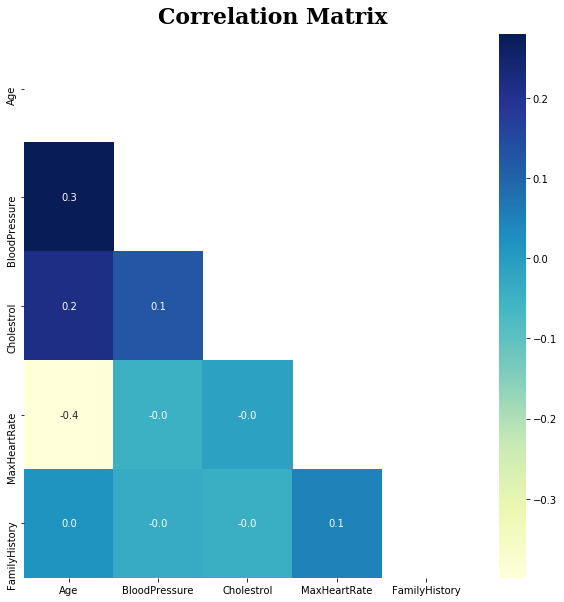

In [227]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
df_corr = df[con_cols].corr().transpose()
color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

##### 3.3.2 Scatterplot heatmap of dataframe

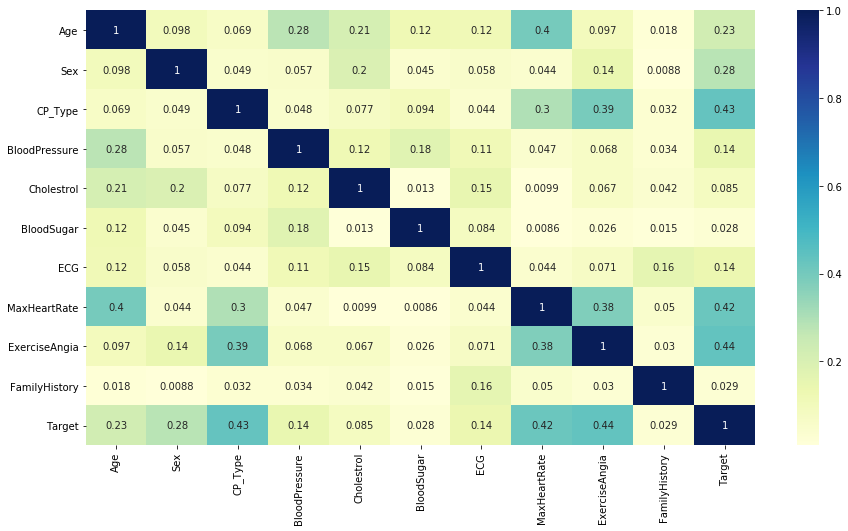

In [228]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(method ='pearson').abs(),annot=True,cmap="YlGnBu")
plt.show()

##### 3.3.3 Scatterplot heatmap of dataframe and Boxen plot of "Cholestrol" Feature after outlier removal

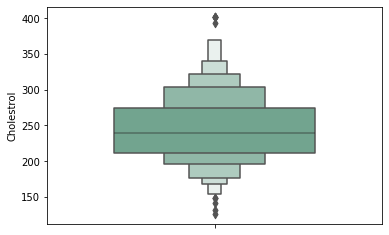

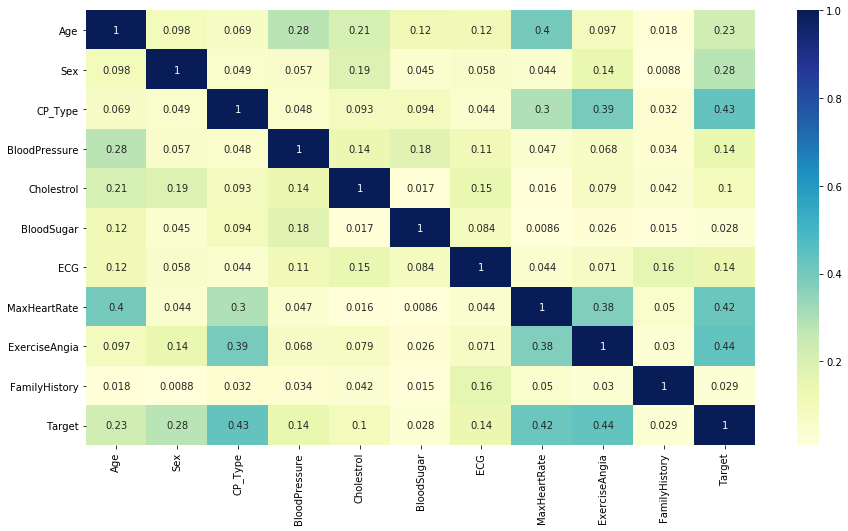

In [229]:
df2 = df.copy()
mean = df2["Cholestrol"].mean()
sd = df2["Cholestrol"].std()
leftVal = mean - 3*sd
rightVal = mean + 3*sd
df2.loc[df["Cholestrol"] > rightVal, "Cholestrol"] = rightVal
sns.boxenplot(y=df2['Cholestrol'],palette=["#6aac90"],width=0.6)
fig = plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(method ='pearson').abs(),annot=True,cmap="YlGnBu")
plt.show()

[back to top](#18)

### 4. Data Preprocessing <a id=11></a>

#### 4.1 Conclusions from the EDA <a id=12></a>

1. There are no NaN values in the data.
2. There are certain outliers in all the continuous features.
3. The data consists of more than twice the number of people with `sex` = 1 than `sex` = 0.
4. There is no apparent linear correlation between continuous variable according to the heatmap.
5. The scatterplot heatmap matrix suggests that there might be some correlation between `Target` and `CP_Type` and `ECG`.
6. It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of `age`    wrt `Target`, it is evident that this isn't the case.
7. According to the distribution plot of `MaxHeartRate` wrt `Target`, people with higher maximum heart rate achieved have higher chances of heart attack.
8. According to the distribution plot of `FamilyHistory` wrt `Target`, number of person affected in family has no influence.
9. The categorical count plot tells about the following -
    - People with chest pain, that is with `CP_Type` = 2 have higher chances of heart attack.
    - People with `ECG` = 1 have high chance of heart attack.
    - People with `sex` = 0 have higher chance of heart attack.
    - People with `BloodSugar` = 0 have much higher chance of heart attack.
    - People with no exercise induced angina, that is with `ExerciseAngia` = 0 have higher chance of heart attack.

#### 4.2 Packages <a id=13></a>

In [230]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...



#### 4.3 Making features model ready <a id=14></a>

##### 4.3.1 Scaling features and Train-Test Split

In [231]:
# creating a copy of df
df1 = df.copy()

# define the columns to be encoded and scaled
cat_cols = ['Sex','CP_Type','BloodSugar','ECG','ExerciseAngia']
con_cols = ["Age","BloodPressure","Cholestrol","MaxHeartRate","FamilyHistory"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['Target'],axis=1)
y = df1[['Target']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The first 5 rows of X are
The shape of X_train is       (242, 13)
The shape of X_test is        (61, 13)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [232]:
X_train

,Age,BloodPressure,Cholestrol,MaxHeartRate,FamilyHistory,Sex_1,CP_Type_1,CP_Type_2,CP_Type_3,BloodSugar_1,ECG_1,ECG_2,ExerciseAngia_1
132,-0.962963,-0.50,0.866142,0.276923,0.0,1,1,0,0,0,1,0,0
202,0.222222,1.00,0.472441,-1.292308,0.0,1,0,0,0,0,0,0,1
196,-0.666667,1.00,-0.141732,-0.184615,0.5,1,0,1,0,0,1,0,0
75,0.000000,0.25,0.157480,0.246154,-0.5,0,1,0,0,0,0,0,0
176,0.370370,-0.65,-0.157480,0.215385,1.0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.370370,0.50,-0.110236,0.307692,0.0,1,0,1,0,0,1,0,0
71,-0.296296,-1.80,-0.204724,0.030769,1.0,1,0,1,0,0,1,0,1
106,1.037037,1.50,-0.094488,-0.676923,0.5,1,0,0,1,1,0,0,0
270,-0.666667,-0.50,0.141732,-0.276923,0.0,1,0,0,0,0,0,0,0


### 4.4 Filter Feature Selection Engineering Techniques <a id=19></a>

##### 4.4.1 Information Gain

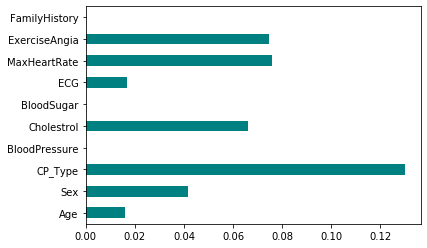

In [233]:
#Information Gain
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
X1 = df.drop(['Target'],axis=1)
y1 = df[['Target']]
importances = mutual_info_classif(X1,y1)
ft_im = pd.Series(importances,df.columns[0:len(df.columns)-1])
ft_im.plot(kind='barh', color = 'teal')
plt.show()

#### 4.4.2 Chi-squared test for Categorical Data

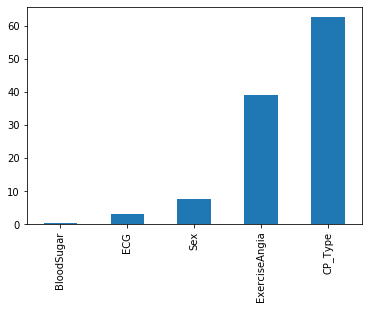

In [234]:
#Chi-squared test
from sklearn.feature_selection import SelectKBest, chi2
cD = df[cat_cols].copy()
f_score = chi2(cD,y1)
p_values = pd.Series(f_score[0],index=cD.columns)
p_values.sort_values(ascending=True,inplace=True)
p_values.plot.bar()
plt.show()

[back to top](#18)

### 5. Modeling <a id=15></a>

### 5.1 Random Forest Classifier <a id=16></a>

### High Level Description of Random Forest <a id=8></a>

Random Forest is a trademark term for an ensemble of decision trees. In Random Forest, we’ve collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

Each tree is planted & grown as follows:

If the number of cases in the training set is N, then sample of N cases is taken at random but with replacement. This sample will be the training set for growing the tree. If there are M input variables, a number m<<M is specified such that at each node, m variables are selected at random out of the M and the best split on these m is used to split the node. The value of m is held constant during the forest growing. Each tree is grown to the largest extent possible. There is no pruning.

In [235]:
classifier_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)
classifier_rf.fit(X_train, y_train)
y_pred = classifier_rf.predict(X_test)

# printing the test accuracy
print(f'The test accuracy score of Random Forest is {accuracy_score(y_test, y_pred):.2%}.')

The test accuracy score of Random Forest is 78.69%.


### 5.2 Gradient Boosting Classifier <a id=17></a>

### High Level Description of Gradient Boosting Classifier <a id=8></a>
The Gradient Boosting Classifier depends on a loss function. A custom loss function can be used,
and many standardized loss functions are supported by gradient boosting classifiers, but the loss
function has to be differentiable.

Classification algorithms frequently use logarithmic loss, while regression algorithms can use squared errors.
Gradient boosting systems don't have to derive a new loss function every time the boosting algorithm is added, 
rather any differentiable loss function can be applied to the system.

Gradient boosting systems have two other necessary parts: a weak learner and an additive component.
Gradient boosting systems use decision trees as their weak learners. Regression trees are used for the weak learners,
and these regression trees output real values. Because the outputs are real values, as new learners are added into the
model the output of the regression trees can be added together to correct for errors in the predictions.

In [236]:
gbt = GradientBoostingClassifier(loss='deviance',learning_rate=0.1,n_estimators=300,
    subsample=0.8,criterion='friedman_mse',min_samples_split=2,min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,max_depth=1,min_impurity_decrease=0.0,
    min_impurity_split=None,init=None,random_state=42,max_features=0.2,
    verbose=0,max_leaf_nodes=None,warm_start=False,presort='deprecated',
    validation_fraction=0.1,n_iter_no_change=None,tol=0.0001)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred_gbt = gbt.predict(X_test)

print(f'The test accuracy score of Gradient Boosting Classifier is {accuracy_score(y_test, y_pred_gbt):.2%}.')

The test accuracy score of Gradient Boosting Classifier is 81.97%.


[back to top](#18)

### 6. Performance Comparison of Random Forest & Gradient Boosting Classifier <a id=20></a>

====================  Random Forest Classifier =====================
=======================   Classifier Report  =======================
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.88      0.69      0.77        32

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61

====================  Confusion Matrix =============================


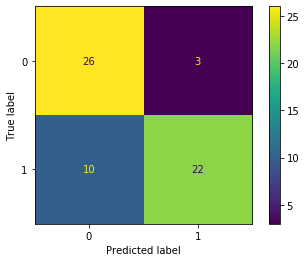

In [237]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print("====================================================================")
print("====================  Random Forest Classifier =====================")
print("=======================   Classifier Report  =======================")
print("====================================================================")
print(classification_report(y_test,y_pred))

print("====================  Confusion Matrix =============================")
plot_confusion_matrix(classifier_rf, X_test, y_test) 
plt.show()  

====================  Gradient Boosting Classifier =================
=======================   Classifier Report    =====================
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

====================  Confusion Matrix =============================


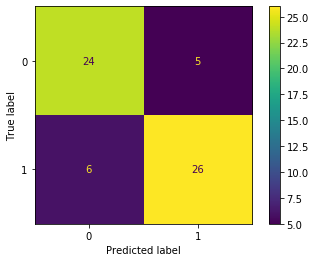

In [238]:
print("====================================================================")
print("====================  Gradient Boosting Classifier =================")
print("=======================   Classifier Report    =====================")
print("====================================================================")
print(classification_report(y_test,y_pred_gbt))
print("====================  Confusion Matrix =============================")
plot_confusion_matrix(gbt, X_test, y_test)
plt.show() 

#### Conclusion: Gradient Boosting Classifier is showing higher accuracy compared to Random Forest Classifier.

[back to top](#18)

# Appendix<a id=21></a>

#### Hyperparameter Tuning of Random Forest Classifier

In [239]:
rf = RandomForestClassifier(n_jobs=-1, oob_score=True)
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200],
    'random_state': [0,42]
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=None,
                                   

In [240]:
grid_search.best_score_

0.7560792349726775

In [241]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [242]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
12,ExerciseAngia_1,0.241579
3,MaxHeartRate,0.184964
7,CP_Type_2,0.122285
0,Age,0.107796
1,BloodPressure,0.096902
5,Sex_1,0.088648
2,Cholestrol,0.059908
6,CP_Type_1,0.033245
10,ECG_1,0.032510
4,FamilyHistory,0.031675


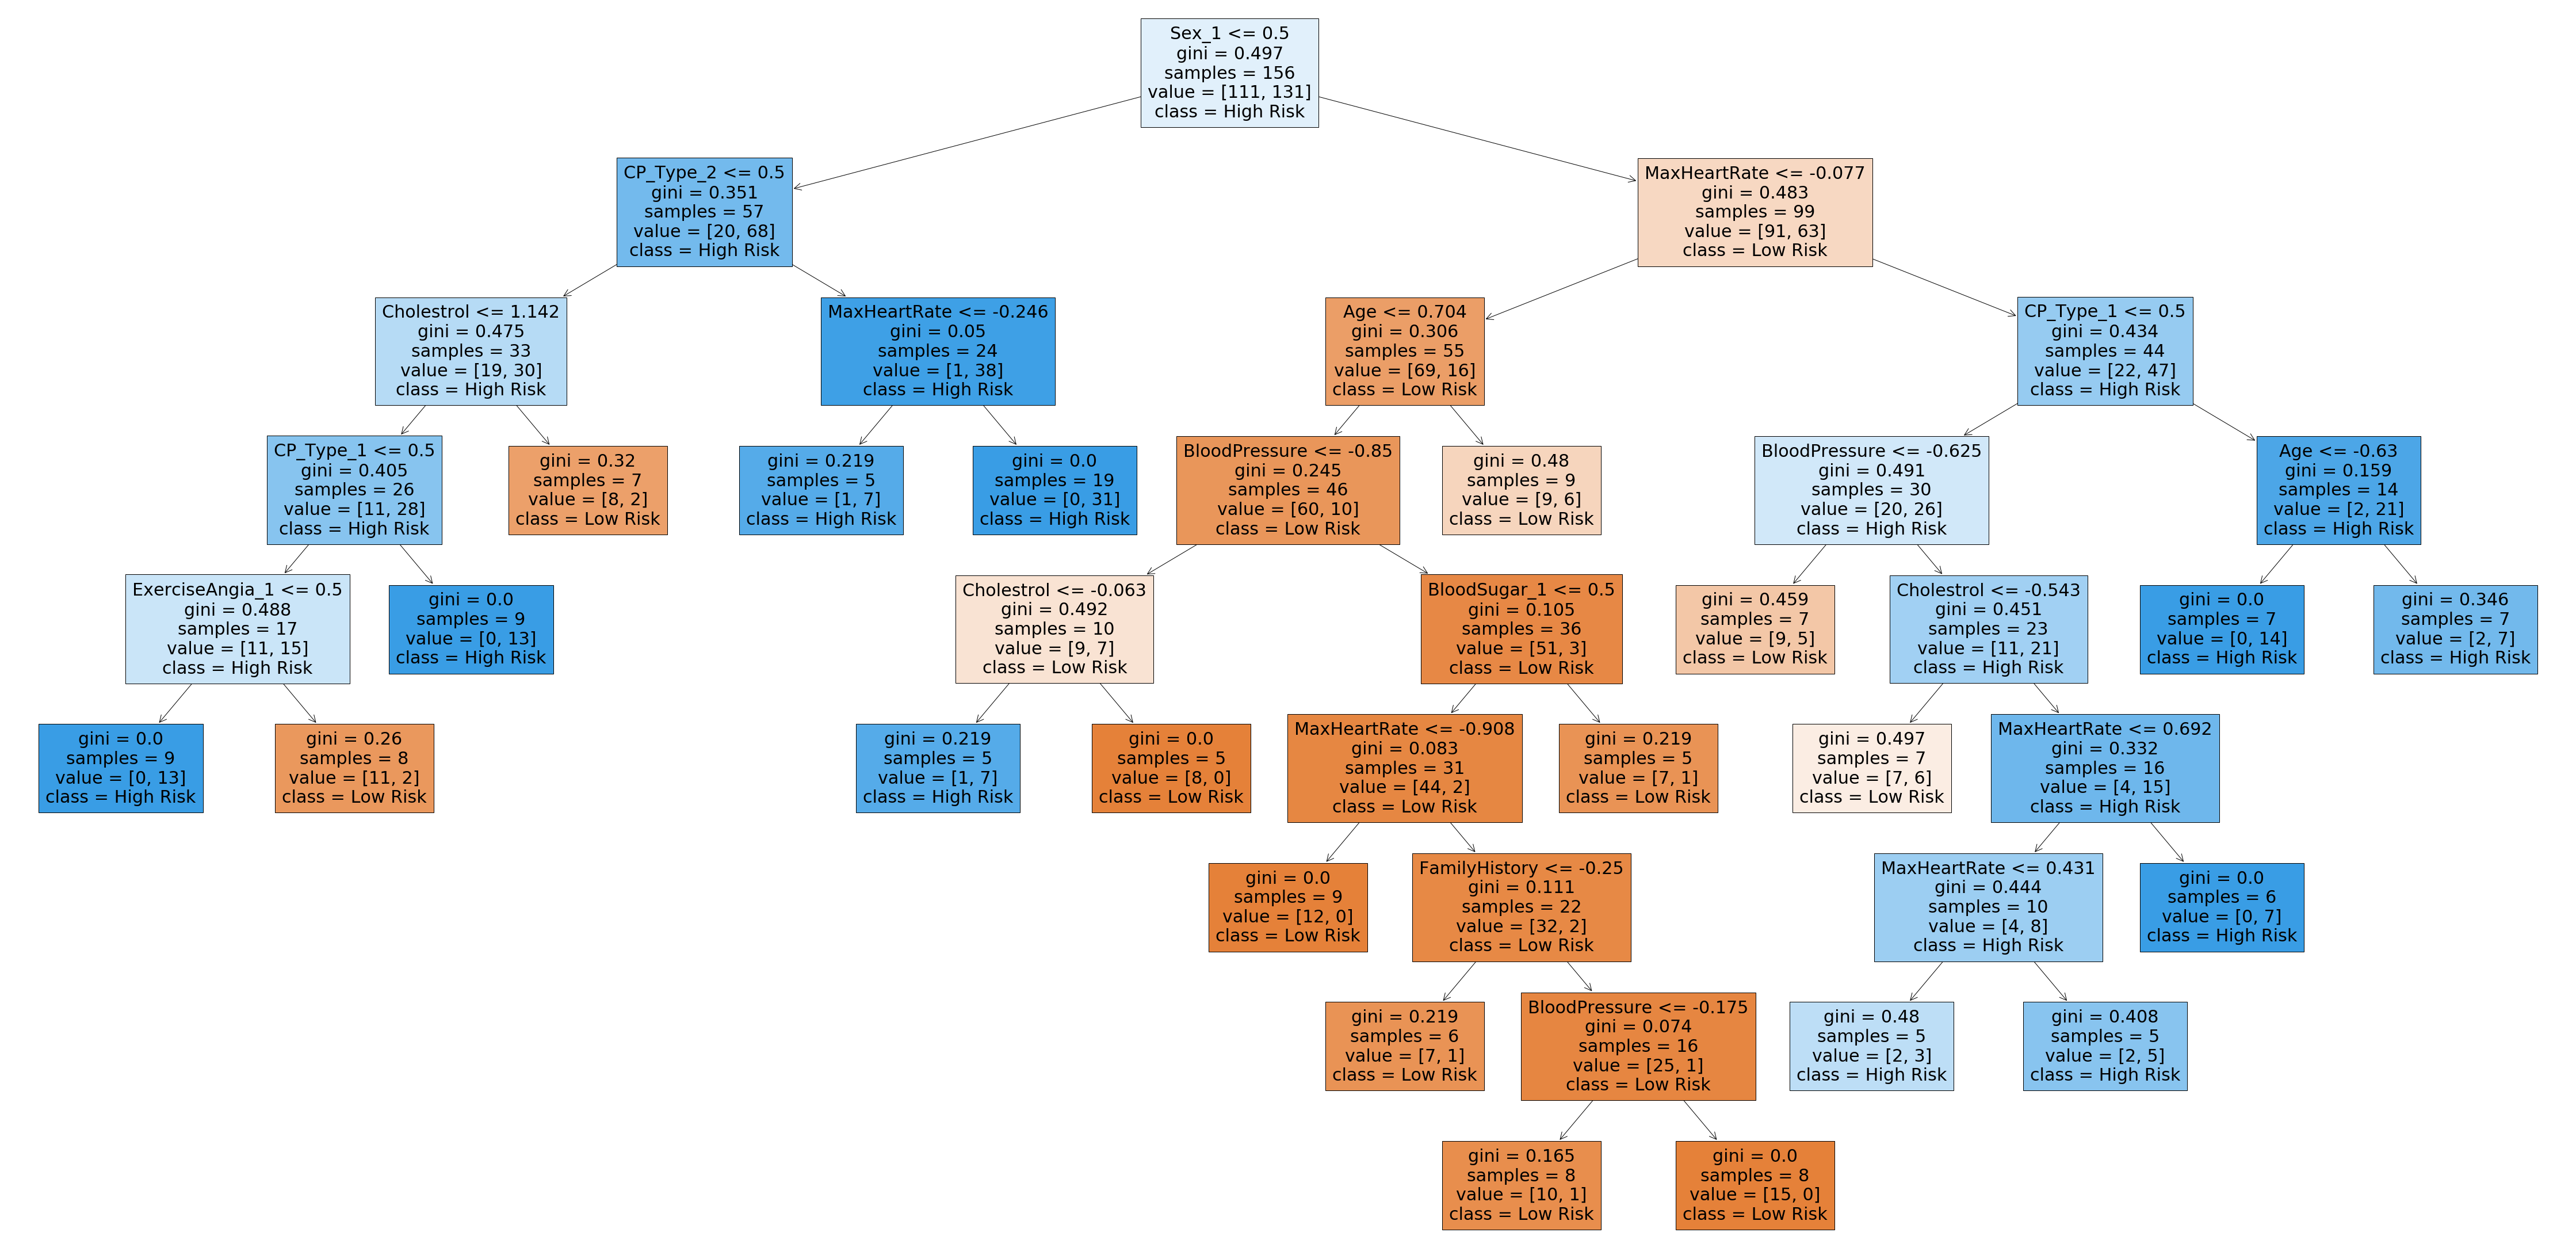

In [243]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['Low Risk', "High Risk"],filled=True);

[back to top](#18)